<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Séries Temporais
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Wrangling;</li>
  <li>Decomposição.</li>
</ol>

---

# **Exercícios**

## 1\. Correlação entre consumo de energia elétrica e temperatura

Neste exercício, vamos correlacionar a base de dados de consumo de energia elétrica vista em aula com uma base de dados de temperatura média das tres maiores cidades do sudeste: **São Paulo**, **Rio de Janeiro** e **Belo Horizonte**. Os dados de temperatura estão presente neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv) e foram extraídos diretamento do [site](https://portal.inmet.gov.br) do instituto nacional de meteorologias (INMTE), órgão do governo vinculado ao ministério de agricultura, pecuária e abastecimento.

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns

### **1.1. Energia**

Carregue os dados de **energia** com o código abaixo e responda as perguntas abaixo:

In [79]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv' -O 'energia.csv'

In [80]:
energia = pd.read_csv('energia.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

In [81]:
energia.head()

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084


In [82]:
energia.tail()

,referencia,residencial,industrial,comercial
199,2020-08-01,5671487,7697947,3198269
200,2020-09-01,5756787,7723167,3431649
201,2020-10-01,6241392,8042503,3890202
202,2020-11-01,5999235,7878699,3718647
203,2020-12-01,6377972,7832769,3965809


Responda:

 - Qual é a granularidade da base de dados: **Mensal**
 - Qual é o intervalo de tempo (min/max): **2004 a 2020**

### **1.2. Temperatura**

Carregue os dados de **temperatura** com o código abaixo e responda as perguntas abaixo:

In [83]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv' -O 'temperatura.csv'

In [84]:
temperatura = pd.read_csv('temperatura.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

In [85]:
temperatura.head()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
0,2018-07-15,18,21.0,19.0
1,2018-07-16,19,23.0,19.0
2,2018-07-17,17,21.0,19.0
3,2018-07-18,18,23.0,19.0
4,2018-07-19,19,23.0,19.0


In [86]:
temperatura.tail()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
896,2020-12-27,20,24.0,23.0
897,2020-12-28,21,25.0,23.0
898,2020-12-29,22,27.0,23.0
899,2020-12-30,24,27.0,23.0
900,2020-12-31,23,29.0,24.0


Responda:

 - Qual é a granularidade da base de dados: **diário**
 - Qual é o intervalo de tempo (min/max): **15/07/2018 até 31/12/2020**

## 2\. Processamento

### **2.1. Energia**

Processe o dataframe `energia`:

 - **a.** Atributa ao index a coluna temporal.

In [87]:
# resposta da questão 2.1.a

energia.head()

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084


In [88]:
energia = energia.set_index(keys=['referencia'])

In [89]:
energia.head()

,residencial,industrial,comercial
referencia,,,
2004-01-01,3694386,6977471,2450453
2004-02-01,3511541,7084623,2396965
2004-03-01,3629455,7087613,2402521
2004-04-01,3733863,7384540,2580914
2004-05-01,3537269,7258307,2344084


 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [90]:
# resposta da questão 2.1.b

energia['2019' : '2020'].head()

,residencial,industrial,comercial
referencia,,,
2019-01-01,6389714,7545071,4370412
2019-02-01,6188834,7285407,4365504
2019-03-01,6072327,7556147,4303463
2019-04-01,5610278,7494816,4115920
2019-05-01,5785412,7597072,4141319


In [91]:
energia['2019' : '2020'].shape

(24, 3)

 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

### **2.2. Temperatura**

Processe o dataframe `temperatura`:

 - **a.** Atributa ao index a coluna temporal.

In [92]:
# resposta da questão 2.2.a

temperatura.head()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
0,2018-07-15,18,21.0,19.0
1,2018-07-16,19,23.0,19.0
2,2018-07-17,17,21.0,19.0
3,2018-07-18,18,23.0,19.0
4,2018-07-19,19,23.0,19.0


In [93]:
temperatura = temperatura.set_index(keys=['referencia'])

In [94]:
temperatura.head()

,temp-media-sp,temp-media-rj,temp-media-mg
referencia,,,
2018-07-15,18,21.0,19.0
2018-07-16,19,23.0,19.0
2018-07-17,17,21.0,19.0
2018-07-18,18,23.0,19.0
2018-07-19,19,23.0,19.0


 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [95]:
# resposta da questão 2.1.b

temperatura['2019' : '2020'].head()

,temp-media-sp,temp-media-rj,temp-media-mg
referencia,,,
2019-01-01,22,28.0,21.0
2019-01-02,25,28.0,24.0
2019-01-03,26,31.0,24.0
2019-01-04,23,31.0,22.0
2019-01-05,21,28.0,23.0


 - **c.** Remova todas as linhas que apresentem pelo menos um valores nulo.

In [96]:
# resposta da questão 2.2.c

temperatura = temperatura.dropna(how='any', axis=0)

In [97]:
temperatura['2019' : '2020'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 643 entries, 2019-01-01 to 2020-12-31
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temp-media-sp  643 non-null    int64  
 1   temp-media-rj  643 non-null    float64
 2   temp-media-mg  643 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 20.1 KB


 - **d.** Combine as três colunas de temperatura em uma só chamada de `temp-media` e agregadas pela **média** (obtendo assim uma temperatura média aproximada da região sudeste).

In [98]:
# resposta da questão 2.2.d
temperatura['temp-media'] = (temperatura['temp-media-sp'] + temperatura['temp-media-rj'] + temperatura['temp-media-mg']) / 3

<ipython-input-98-6b696cd3e171>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperatura['temp-media'] = (temperatura['temp-media-sp'] + temperatura['temp-media-rj'] + temperatura['temp-media-mg']) / 3


 - **f.** Reamostre o dataframe para que sua granularidade seja a mesma dos dados de consumo de energia elétrica. Utilize a **média** como métrica de agregação.

In [99]:
# resposta da questão 2.2.f
resampled_temp = temperatura['2019':'2020'].resample(rule='1m').mean() # aumentando a granularidade de dias para meses

In [100]:
resampled_temp.head()

,temp-media-sp,temp-media-rj,temp-media-mg,temp-media
referencia,,,,
2019-01-31,24.000000,29.774194,24.483871,26.086022
2019-02-28,21.928571,27.464286,23.571429,24.321429
2019-03-31,21.258065,26.645161,23.032258,23.645161
2019-04-30,20.833333,26.066667,22.600000,23.166667
2019-05-31,19.161290,24.193548,21.225806,21.526882


In [101]:
resampled_temp.shape

(24, 4)

 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

## 3\. Correlação

### **3.1. Consumo residencial**

 - **a.** Gere um gráfico de linha para a série temporal de **temperatura** média agregada `temp-media`.

<ipython-input-102-268eb6e5e0b8>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=resampled_temp, x='referencia', y='temp-media', marker="1", palette="pastel")


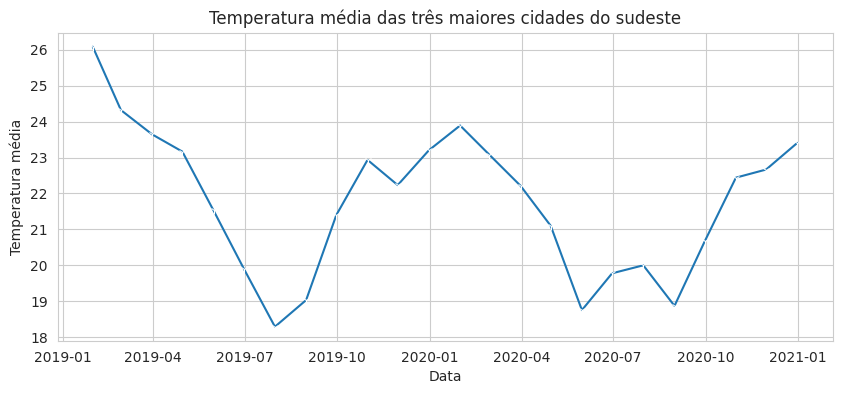

In [102]:
# resposta da questão 3.1.b
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=resampled_temp, x='referencia', y='temp-media', marker="1", palette="pastel")
  grafico.set(title='Temperatura média das três maiores cidades do sudeste', ylabel='Temperatura média', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

 - **b.** Gere um gráfico de linha para a série temporal do consumo de energia **residencial**.

In [103]:
# resposta da questão 3.1.b

energia['2019':'2020'].head()

,residencial,industrial,comercial
referencia,,,
2019-01-01,6389714,7545071,4370412
2019-02-01,6188834,7285407,4365504
2019-03-01,6072327,7556147,4303463
2019-04-01,5610278,7494816,4115920
2019-05-01,5785412,7597072,4141319


<ipython-input-104-374843ef3591>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=energia['2019':'2020'], x='referencia', y='residencial', marker="1", palette="pastel")


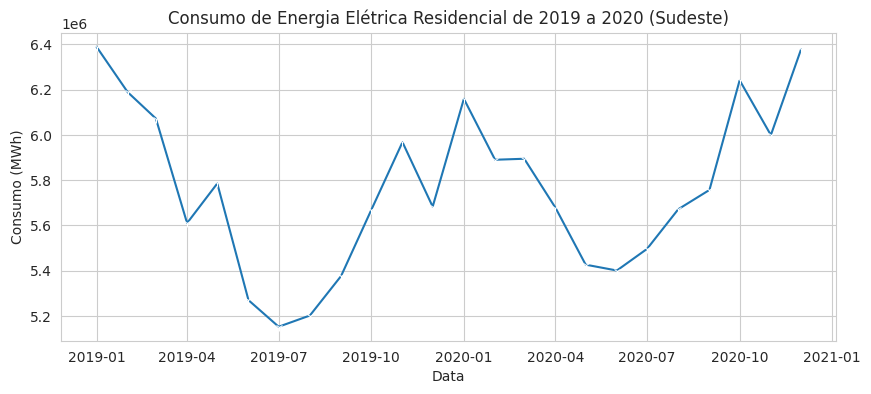

In [104]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=energia['2019':'2020'], x='referencia', y='residencial', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica Residencial de 2019 a 2020 (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

 - **c.** Utilize o método `corrcoef` do pacote Numpy para calcular o coeficiente de Pearson entre o consumo de energia elétrica **residencial** e a **temperatura** média agregada `temp-media`.

In [105]:
energia_2019 = energia['2019' : '2020']

In [106]:
energia_2019.tail()

,residencial,industrial,comercial
referencia,,,
2020-08-01,5671487,7697947,3198269
2020-09-01,5756787,7723167,3431649
2020-10-01,6241392,8042503,3890202
2020-11-01,5999235,7878699,3718647
2020-12-01,6377972,7832769,3965809


In [107]:
resampled_temp.head()

,temp-media-sp,temp-media-rj,temp-media-mg,temp-media
referencia,,,,
2019-01-31,24.000000,29.774194,24.483871,26.086022
2019-02-28,21.928571,27.464286,23.571429,24.321429
2019-03-31,21.258065,26.645161,23.032258,23.645161
2019-04-30,20.833333,26.066667,22.600000,23.166667
2019-05-31,19.161290,24.193548,21.225806,21.526882


In [108]:
# resposta da questão 3.1.c
coeficiente = np.corrcoef(energia_2019['residencial'], resampled_temp['temp-media'], rowvar=False)

In [109]:
print(coeficiente)

[[1.         0.82427182]
 [0.82427182 1.        ]]


 - **d.** Baseado nas respostas dos items anteriores, responda: A temperatura é um bom atributo para prever o consumo de energia elétrica **residencial**?



**Resposta:** Com o resultado do coeficiente de pearson próximo de 1 podemos afirmar que existe uma correlação entre a temperatura e o consumo elétrico residencial.

### **3.2. Consumo comercial**

Repita o exercício 3.1. para dados de consumo de energia elétrica **comercial**.

<ipython-input-110-391eb7db367a>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=resampled_temp, x='referencia', y='temp-media', marker="1", palette="pastel")


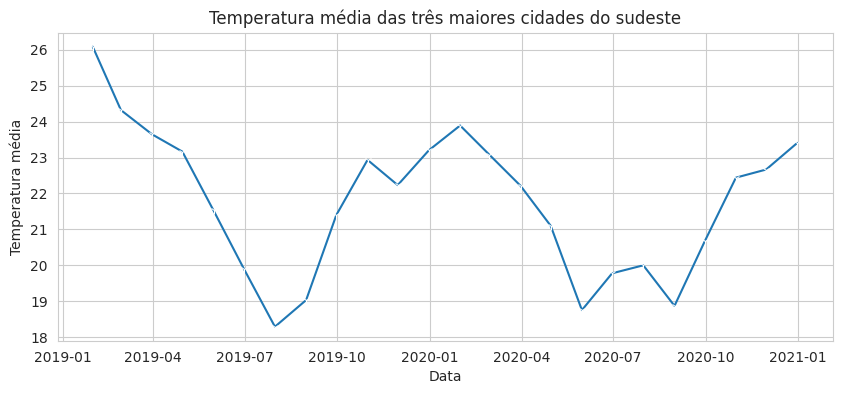

In [110]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=resampled_temp, x='referencia', y='temp-media', marker="1", palette="pastel")
  grafico.set(title='Temperatura média das três maiores cidades do sudeste', ylabel='Temperatura média', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

<ipython-input-111-51f77b189fa7>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=energia['2019':'2020'], x='referencia', y='comercial', marker="1", palette="pastel")


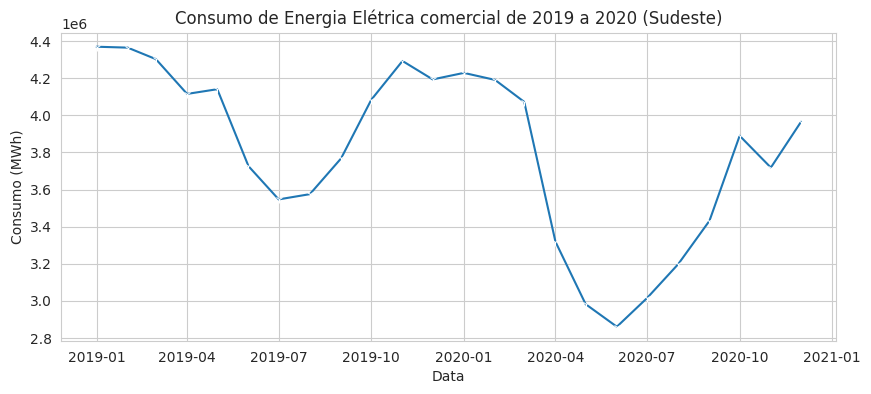

In [111]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=energia['2019':'2020'], x='referencia', y='comercial', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica comercial de 2019 a 2020 (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

In [112]:
comercial = np.corrcoef(energia_2019['comercial'], resampled_temp['temp-media'], rowvar=False)

In [113]:
print(comercial)

[[1.         0.82350289]
 [0.82350289 1.        ]]


* Assim como no consumo de energia residencial o consumo comercial apresenta uma grande correlação com a temperatura.

### **3.3. Consumo industrial**

Repita o exercício 3.1. para dados de consumo de energia elétrica **industrial**.

<ipython-input-114-391eb7db367a>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=resampled_temp, x='referencia', y='temp-media', marker="1", palette="pastel")


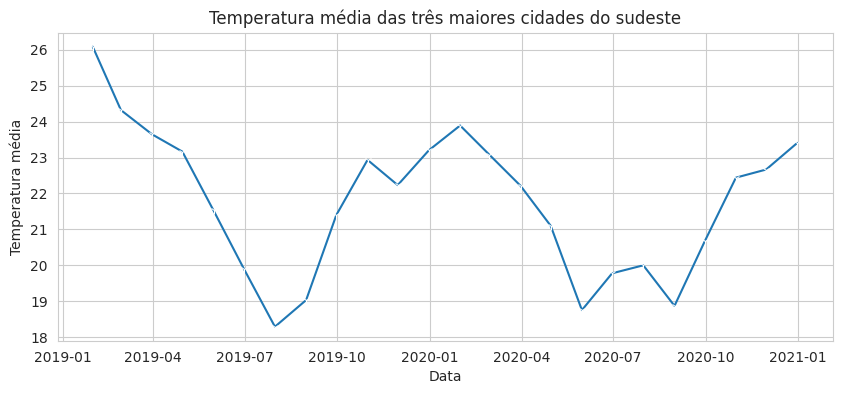

In [114]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=resampled_temp, x='referencia', y='temp-media', marker="1", palette="pastel")
  grafico.set(title='Temperatura média das três maiores cidades do sudeste', ylabel='Temperatura média', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

<ipython-input-115-8af2e0c85a69>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=energia['2019':'2020'], x='referencia', y='industrial', marker="1", palette="pastel")


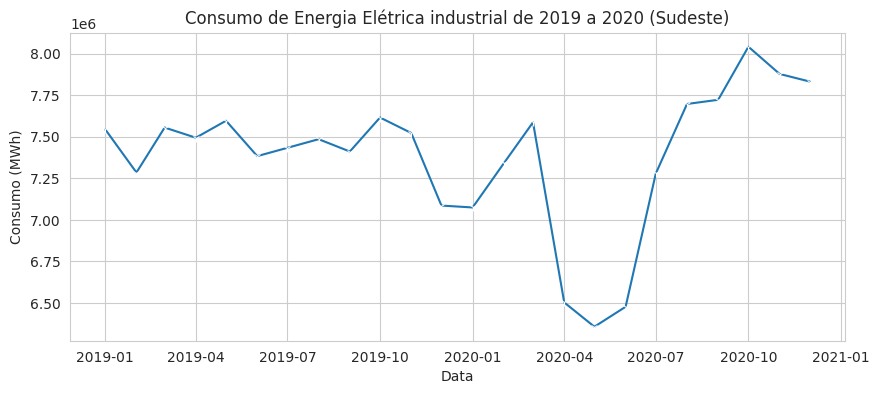

In [115]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=energia['2019':'2020'], x='referencia', y='industrial', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica industrial de 2019 a 2020 (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

In [116]:
industrial = np.corrcoef(energia_2019['industrial'], resampled_temp['temp-media'], rowvar=False)

In [117]:
print(industrial)

[[1.         0.28732297]
 [0.28732297 1.        ]]


* A correlação entre o consumo de energia industrial com a temperatura é menor comparado ao consumo residencial e comercial.

---